# Sentiment Analysing for customer reviews

Most of the Restaurants ask reviews to the customers and based on the reviews the restaurant can improve the customer satisfaction. So Reviews plays a vital role for the successful growth of the restaurant.

The aim of this project is to predict whether the review is positive or negative. This project implemented by Natural Language Processing, Naive Bayes & Random Forest on Python.

The dataset consists of 1000 rows and 2 columns. Review Column consist of customer reviews and like column consist of 0 and 1. If the review is positive, 1 and if negative, 0.

let’s get our environment ready with the libraries we’ll need and then import the data!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import our dataset and make check out the data

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


figure out the type column and number of data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Visualising the missing data in the dataset! As we can see in the below visualisation there is no missing data in our data

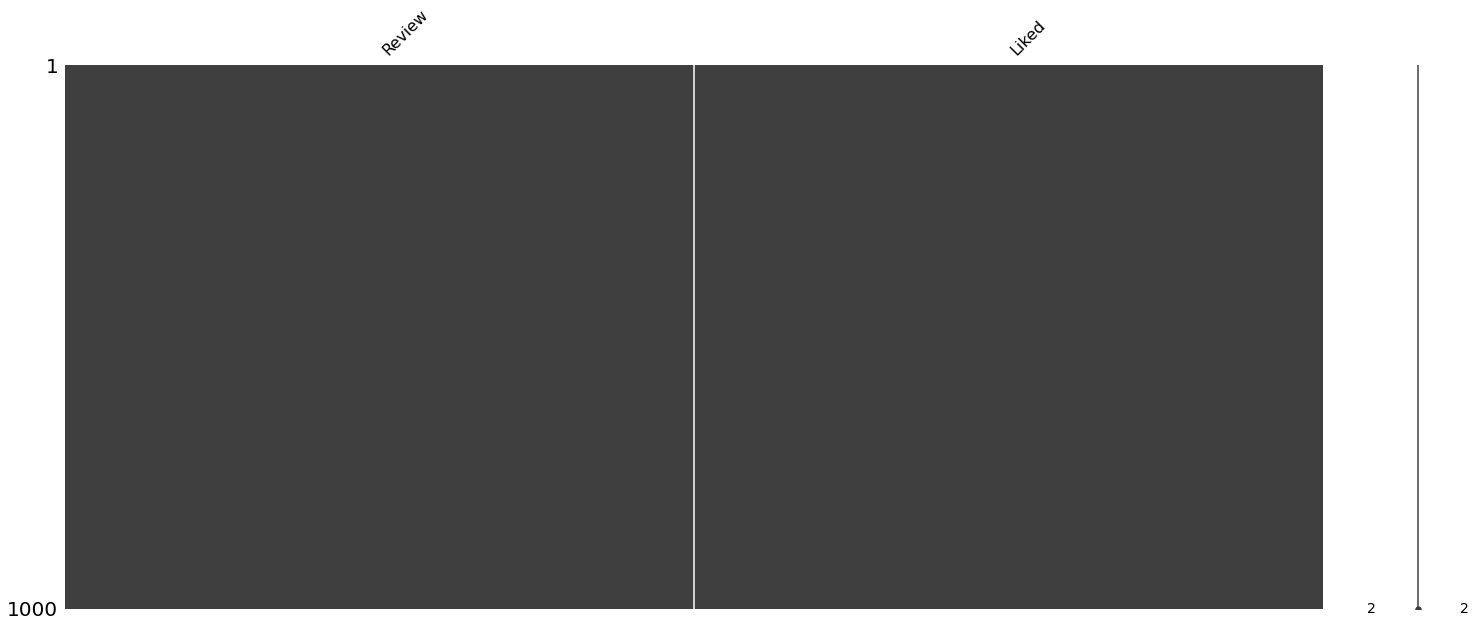

In [6]:
import missingno as msno
msno.matrix(df)

# Exploratory Data Analysis

Let’s use describe by Liked, this way we can begin to think about the features that separate Like and Dislike. we also can see the top frequency of our reviews

In [ ]:
df.groupby('Liked').describe()

Let’s make a new column to detect how long the text reviews are

In [ ]:
df['Length'] = df['Review'].apply(len)
df.head()

Let’s see the percentage of ham and spam in our dataset

In [ ]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Liked'].value_counts(), explode=explode,labels=['Like','Dislike'], autopct='%1.1f%%',
        shadow=True)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In the next step we need to figure out the distribution of review length in our dataset

In [ ]:
plt.figure(figsize=(10,6))
df['Length'].plot.hist(bins = 100)

in the next step we need to extract the information from the length of the reviews from dataset

In [ ]:
df['Length'].describe()

let's find out the maximum length of the dataset

In [ ]:
df[df['Length'] == 149]['Review'].iloc[0]

# Text Cleaning

Cleaning the text

In [ ]:
import re

at the first step of cleaning the text is to delete all the useless words

In [ ]:
review = re.sub('[^a-zA-Z]',' ', df['Review'][0])
review

The seccond step for cleaning the text is going to be about putting all the letters of restaurant reviews in lowecase

In [ ]:
review = review.lower()
review

the third step is to remove all the non significante word. 

that is the words which are not relevant into predicting whether the review is positive or negative and apply stemming to our dataset

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In this part we will split the word of each reviews

In [ ]:
review = review.split()
review

In [ ]:
ps = PorterStemmer()

In this part we will eliminate the useless word such as this, a, an, ... from the dataset

In [356]:
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
review

['wow', 'love', 'place']

in this step we will convert the list which we created before to string and join all the words together

In [357]:
review = ' '.join(review)
review

'wow love place'

Let's apply the cleaning text process into all the reviews

In [358]:
corpus = []
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]',' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [359]:
corpus[:15]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair']

creating bag of words model

In [360]:
from sklearn.feature_extraction.text import CountVectorizer

In [361]:
cv = CountVectorizer().fit(df['Review'])

Print total number of vocab words

In [362]:
print(len(cv.vocabulary_))

2035


Let’s take one text message and get its bag-of-words counts as a vector, putting to use our new bow_transformer

In [363]:
message4 = df['Review'][3]
print(message4)

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.


Now let’s see its vector representation

In [364]:
bow4 = cv.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 64)	1
  (0, 139)	1
  (0, 264)	1
  (0, 557)	1
  (0, 867)	1
  (0, 945)	1
  (0, 991)	1
  (0, 1046)	1
  (0, 1087)	1
  (0, 1208)	1
  (0, 1444)	1
  (0, 1488)	1
  (0, 1691)	1
  (0, 1699)	1
  (0, 1780)	1
(1, 2035)


Let’s see which ones appear twice in our dataset

In [365]:
X = cv.fit_transform(corpus)
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurences: ', X.nnz)

Shape of Sparse Matrix:  (1000, 1565)
Amount of Non-Zero occurences:  5372


In [366]:
sparsity = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.34325878594249204


# TF-IDF

Now let’s compute term weighting and do normalisation with TF-IDF

In [367]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(X)
tfidf4 = tfidf_transformer.transform(X)
print(tfidf4)

  (0, 1547)	0.7681483384958535
  (0, 1028)	0.37891311005388717
  (0, 802)	0.5161133452017592
  (1, 594)	0.44530826402032975
  (1, 324)	0.895377322694293
  (2, 1374)	0.6095408468238828
  (2, 1362)	0.5068726783980841
  (2, 900)	0.6095408468238828
  (3, 1311)	0.31658892883770084
  (3, 1304)	0.37344829688459497
  (3, 1149)	0.37344829688459497
  (3, 1115)	0.25693127784313774
  (3, 834)	0.31658892883770084
  (3, 802)	0.22681356327865146
  (3, 762)	0.3524631959077566
  (3, 667)	0.37344829688459497
  (3, 92)	0.37344829688459497
  (4, 1205)	0.5657558480490441
  (4, 1062)	0.49789374877517795
  (4, 852)	0.5294243460432808
  (4, 608)	0.3895279157461649
  (5, 1497)	0.38439817982521884
  (5, 1016)	0.45159844554308565
  (5, 578)	0.3493612006084169
  (5, 333)	0.4770813062326693
  :	:
  (997, 1545)	0.42408678118961624
  (997, 964)	0.5373607577988255
  (997, 703)	0.5274480716124954
  (997, 588)	0.3542827182320424
  (997, 83)	0.35731793309667187
  (998, 1523)	0.4066946722599526
  (998, 1443)	0.4066946722

# Create Model using Random Forest

In [368]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier.fit(tfidf4, df['Liked'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Examine our predicted value and expected value

In [369]:
print('predicted:', classifier.predict(tfidf4)[0])
print('expected:', df.Liked[3])

predicted: 1
expected: 1


# Model Evaluation

Let’s check out the accuracy of our model in entire dataset

In [370]:
all_predictions = classifier.predict(X)
print(all_predictions)

[1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1
 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1
 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1
 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0
 1 1 0 1 1 0 0 0 1 1 1 0 

Create Classification Report

In [371]:
from sklearn.metrics import classification_report
print (classification_report(df['Liked'], all_predictions))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       500
           1       0.86      0.93      0.90       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



# Train Test Split

Splitting the data into training set and test set. We use sklearn library for that. I use %25 for test my regression and %75 for train my regression.

In [373]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['Review'], df['Liked'], test_size=0.25)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

750 250 1000


# Creating a Pipeline

Let’s run our model again and then predict the test set. We will create and use a pipeline for this purpose

In [374]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('X', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ SVM
])

In [375]:
pipeline.fit(msg_train,label_train)

/Users/sadegh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('X',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None))...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

Making prediction

In [376]:
predictions = pipeline.predict(msg_test)

# Evaluation of Model

# Making Confusion Matrix

Confusion Matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

Text(0.5, 257.44, 'Predicted label')

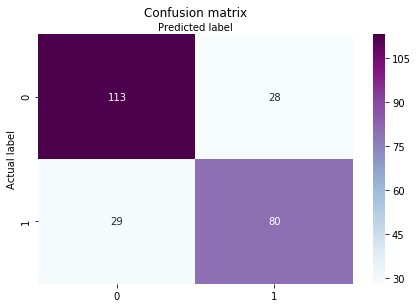

In [377]:
plt.figure(figsize=(10,6))
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(label_test,predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Create classification report

In [378]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       142
           1       0.73      0.74      0.74       108

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250



In [380]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(predictions,label_test))

Accuracy: 0.772


In [381]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,1].values

# Create Model using Naive Bayes

In [382]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [383]:
# fitting Naive Bayes into the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [384]:
# Prediction the test set
y_pred = classifier.predict(X_test)

# Evaluation of Model

In [385]:
from sklearn.metrics import confusion_matrix,classification_report

In [386]:
cm = confusion_matrix(y_test,y_pred)

Text(0.5, 257.44, 'Predicted label')

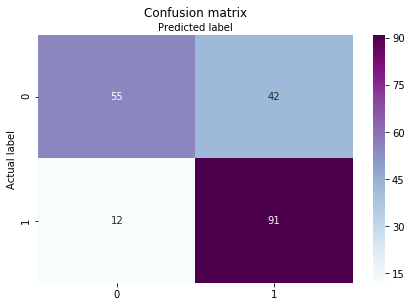

In [387]:
plt.figure(figsize=(10,6))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Create classification report

In [388]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



Get the accuracy

In [389]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.73


Comparing the two different accuracy which got from the algorithms

In [395]:
algorithms = ['Random Forest', 'Naive Bayes']
accuracy = [0.77, 0.73]

<BarContainer object of 2 artists>

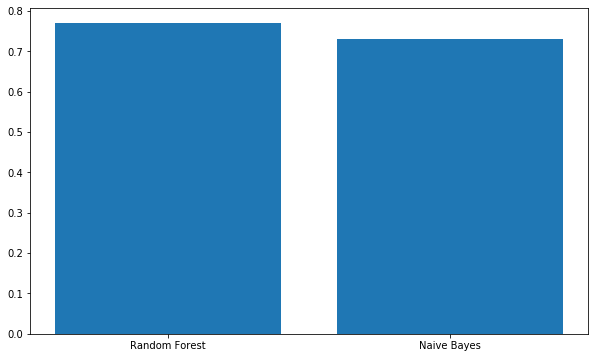

In [396]:
plt.figure(figsize=(10,6))
plt.bar(x = algorithms, height=accuracy)

# Theoretical details

This project was about the sentiment analysis for restaurant analysis. In order to analysis the reviews of customers We Used NLP (Natural Language Processing). Natural Language Processing can be used in every aspect of project from chatbots to search engines, and is used in diverse tasks like sentiment analysis and machine translation. 

This Project contains of the the below steps:
1. Firstly delete punctuation("",.:;)
2. Then split all word
3. Then convert all word to lowercase
4. Find word root with lemmatizer
5. Make bag of word(It is including the most using word and sentence's info)
6. Make prediction model
7. Camparing the two different models which has been used

In this project we used text preprocessing, tokenizing and filtering of stopwords to converts text data to vectors

After creating the vector we will use the two different algorithm in order to make prediction which contains Random Forest and Naive Bayes

1. Random Forest : 
Random forests is one of the supervised learning algorithm. This method is using for both classification and regression purposes. It is also the most and famous algorithm that Data Scientist using it for solving their problems. Random forests will create the decision trees on the data samples and randomly it will selected it, it also gets prediction from each tree and selects the best solution by means of results. It also find out best indicator of the feature importance.

Working of Random Forest Algorithm
The Random Forest Algorithm will follow up the following steps:

Step 1 − First, select sample from dataset randomly and then start with these sample data.

Step 2 − Next, making a decision tree to each sample which has been selected. Then it will copute the prediction from each decision tree.

Step 3 − In the next step,  the voting will be performed for every predicted result.

Step 4 − Finally, it will select the most voted prediction as the final prediction result.

For getting the prediction we have splitted the data into training set and test set and then make the prediction from that. The model which have been created in Random Forest we got %77 of Accuracy.

Furthermore, In order to make the different prediction, I used Naive Bayes Algorithm for this project

2. Naive Bayes: A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. This method is based on the Bayes theorem.

Bayes’ Theorem is stated as:

P(h|d) = (P(d|h) * P(h)) / P(d)

Where

1. P(h|d) is the probability of hypothesis h given the data d. This is called the posterior probability.
2. P(d|h) is the probability of data d given that the hypothesis h was true.
3. P(h) is the probability of hypothesis h being true (regardless of the data). This is called the prior probability of h.
4. P(d) is the probability of the data (regardless of the hypothesis).

Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

In This project for naive Bayes Algorithm we splitted the data into training set and test test in order to get the prediction model. In this model we got %73 accuracy result which is lower than Random Forest.